In [5]:
import numpy as np

In [6]:
def kmeans_numpy(X, n_clusters, max_iters=100):

    """
    Hint:
    if implementing using numpy array:
    the shape of centroids is (n_clusters x 3), a 2D array
    The shape of labels is (for the given sample image) 512 x 512 = 262144 --> a 1D array
    """
    # Initialize cluster centroids randomly
    centroids = X[np.random.choice(len(X), n_clusters, replace=False)]

    for _ in range(max_iters):
        # Calculate the distance from each point to each centroid
          ###########
          distances = np.sqrt(np.sum((X - centroids[:, np.newaxis])**2, axis=2))
          ###########
        # Assign each point to the nearest cluster
          ###########
          labels = np.argmin(distances, axis=0)
          ###########
        # Create an empty array to store the new centroids
          new_centroids = np.zeros((n_clusters, X.shape[1]))

        # Loop through each cluster
          for i in range(n_clusters):
            # Find all data points that belong to the current cluster
            cluster_points = X[labels == i]

            # Calculate the mean (average) of all data points in the cluster
            cluster_mean = cluster_points.mean(axis=0)

            # Assign the cluster mean as the new centroid
            new_centroids[i] = cluster_mean

        # Check for convergence
          if np.all(centroids == new_centroids):
            break

          centroids = new_centroids

    return centroids, labels

In [7]:
def create_compressed_image(labels, centroids, height, width, channels):
    """
    Hint:
    Assign the cluster value to the pixel of that cluster
    """
    # Step 3: Create a compressed image based on cluster centroids
    compressed_image = np.zeros((height, width, channels), dtype=np.uint8)

    for i in range(height):
        for j in range(width):
          ###########
          compressed_image[i][j] = centroids[labels[i*width + j]]
          ###########

    return compressed_image

Original image size: 521129 bytes
Compressed image size: 165716 bytes
Compression ratio: 3.14


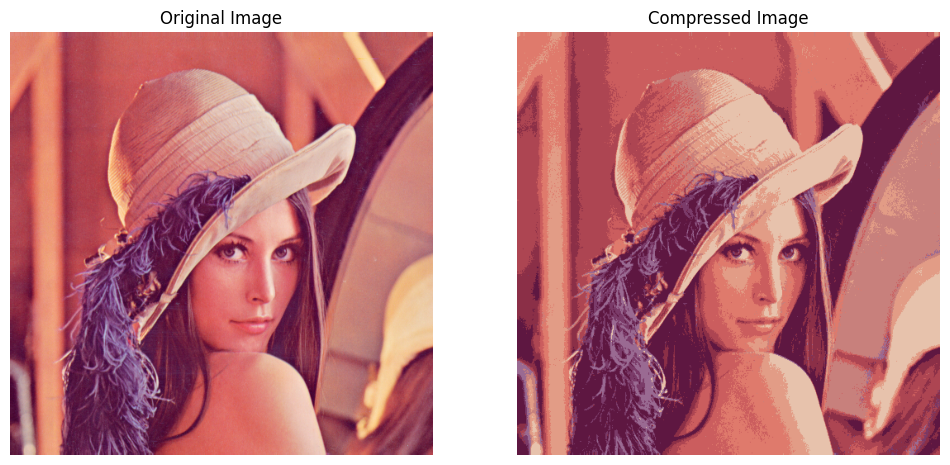

Original image size: 521129 bytes
Compressed image size: 32390 bytes
Compression ratio: 16.09


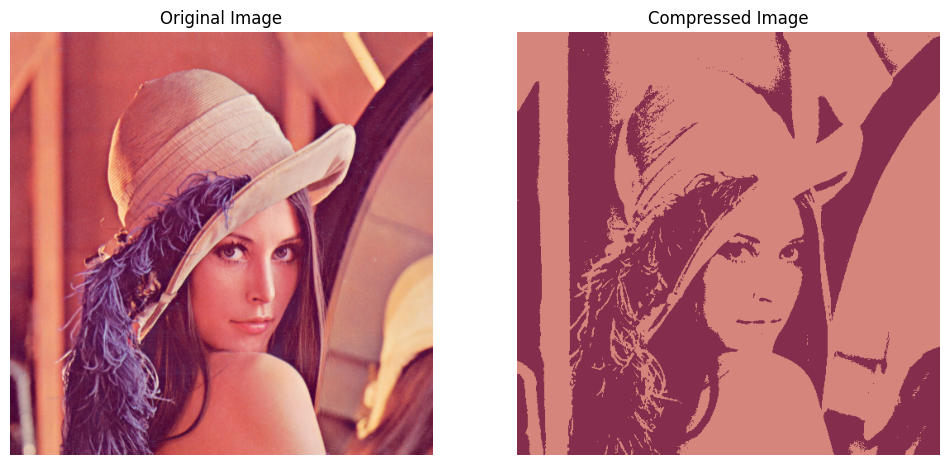

Original image size: 521129 bytes
Compressed image size: 92063 bytes
Compression ratio: 5.66


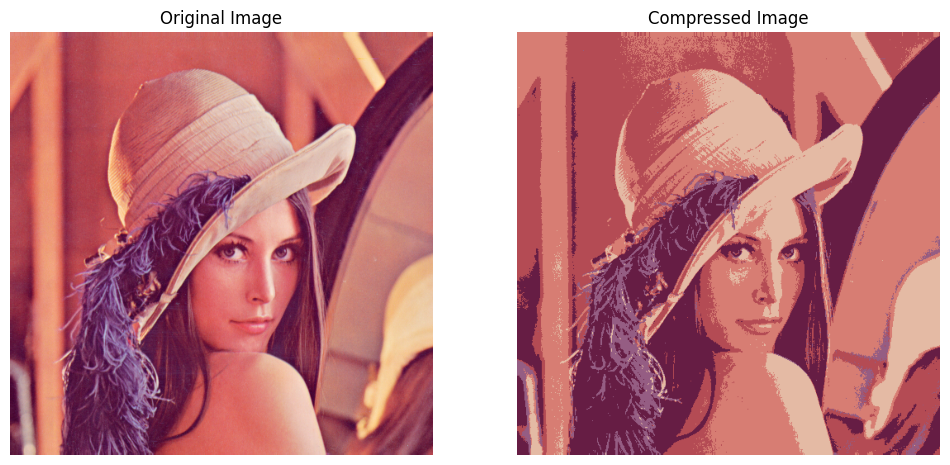

In [8]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def kmeans_image_compression(image_path, num_clusters):
    # Step 1: Load the image
    original_image = cv2.imread(image_path)

    # Convert the image to RGB color space (if it's not already)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    # Get the dimensions of the image
    height, width, channels = original_image.shape

    # Step 2: Apply K-means clustering using numpy
    pixel_values = original_image.reshape(-1, 3)
    centroids, labels = kmeans_numpy(pixel_values, num_clusters)

    # Step 3: Create a compressed image based on cluster centroids
    compressed_image = create_compressed_image(labels, centroids, height, width, channels)

    # Step 4: Save the compressed image
    compressed_image_path = "compressed_image.png"
    cv2.imwrite(compressed_image_path, cv2.cvtColor(compressed_image, cv2.COLOR_RGB2BGR))

    # Save the original image in the same format as the compressed one
    original_image_path = "original_image.png"
    cv2.imwrite(original_image_path, cv2.cvtColor(original_image, cv2.COLOR_RGB2BGR))

    # Calculate and print the compression ratio
    original_size = os.path.getsize(original_image_path)
    compressed_size = os.path.getsize(compressed_image_path)
    compression_ratio = original_size / compressed_size

    print(f"Original image size: {original_size} bytes")
    print(f"Compressed image size: {compressed_size} bytes")
    print(f"Compression ratio: {compression_ratio:.2f}")

    # Show the original and compressed images using matplotlib
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(compressed_image)
    plt.title("Compressed Image")
    plt.axis("off")

    plt.show()

if __name__ == "__main__":
    image_path = "test_image.png"

    num_clusters = 10  # Adjust the number of clusters as needed
    kmeans_image_compression(image_path, num_clusters)

    #test with different numbers of clusters
    num_clusters = 2
    kmeans_image_compression(image_path, num_clusters)

    num_clusters = 5
    kmeans_image_compression(image_path, num_clusters)

    # num_clusters = 15
    # kmeans_image_compression(image_path, num_clusters)

    # num_clusters = 20
    # kmeans_image_compression(image_path, num_clusters)

    # num_clusters = 30
    # kmeans_image_compression(image_path, num_clusters)

    # num_clusters = 40
    # kmeans_image_compression(image_path, num_clusters)

    # num_clusters = 50
    # kmeans_image_compression(image_path, num_clusters)


We can see that as we increase the number of clusters, we somewhat increase the resolution of the picture and have the output more detailed and partitioned. Increasing the number of clusters increases the quality of the image, hence its size (KB).